In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset

In [12]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

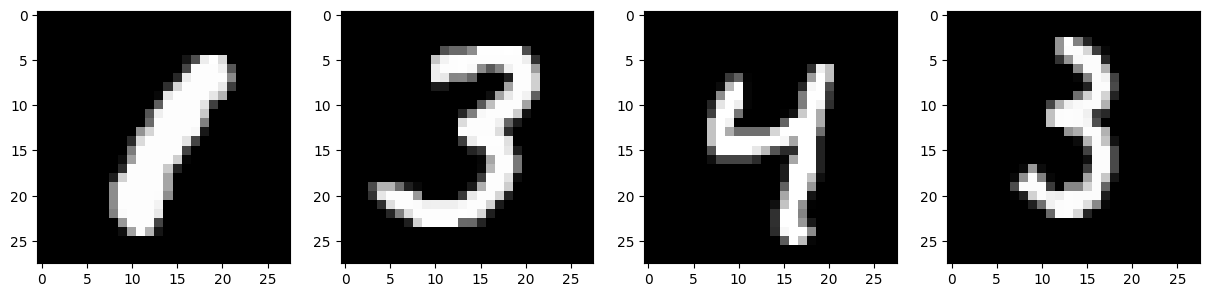

In [13]:
import matplotlib.pyplot as plt

OBJECT = 5477

figure, axes = plt.subplots(1, 4, figsize = (15, 5))
axes[0].imshow(train_images[5477], cmap = 'gray')
axes[1].imshow(train_images[235], cmap = 'gray')
axes[2].imshow(train_images[45778], cmap = 'gray')
axes[3].imshow(train_images[1234], cmap = 'gray')

### Features

In [14]:
import os
import cvtda.topology

def make_features(name: str, binarizer, filtration):
    if os.path.exists(f"7/{name}/test_features.npy"):
        return
    
    train = train_images.copy()
    test = test_images.copy()

    if binarizer is not None:
        train = binarizer.fit_transform(train)
        test = binarizer.transform(test)
        
    if filtration is not None:
        train = filtration.fit_transform(train)
        test = filtration.transform(test)

    filtrations_to_diagrams = cvtda.topology.FiltrationsToDiagrams(homology_dimensions = [ 0, 1 ])
    train = filtrations_to_diagrams.fit_transform(train)
    test = filtrations_to_diagrams.transform(test)
    print(train.shape, test.shape)

    if len(train[0]) < 96:
        n_bins = 32
    elif len(train[0]) < 192:
        n_bins = 64
    else:
        n_bins = 128
    print(f"Bins: {n_bins}")
    digrams_to_features = cvtda.topology.DiagramsToFeatures(batch_size = 625, n_bins = n_bins)
    train = digrams_to_features.fit_transform(train)
    test = digrams_to_features.transform(test)
    print(train.shape, test.shape)

    os.makedirs(f"7/{name}", exist_ok = True)
    numpy.save(f"7/{name}/train_features.npy", train)
    numpy.save(f"7/{name}/test_features.npy", test)


In [15]:
make_features("raw", binarizer = None, filtration = None)

Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:11<00:00, 5344.72it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7396.91it/s]


(60000, 80, 3) (10000, 72, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 20.10it/s]

(60000, 114) (10000, 114)


In [16]:
import itertools
import gtda.images

greyscale_to_filtrations = cvtda.topology.GreyscaleToFiltrations(
    binarizer_threshold = 0.4,
    radial_filtration_centers = list(itertools.product([ 3, 8, 13, 18, 23 ], [ 3, 8, 13, 18, 23 ]))
)
for i, filtration in enumerate(greyscale_to_filtrations.filtrations_):
    print(f"{i}/{len(greyscale_to_filtrations.filtrations_)}). {filtration}")
    make_features(
        f"{type(filtration).__name__}{i}",
        binarizer = gtda.images.Binarizer(threshold = 0.4),
        filtration = filtration
    )

0/25). RadialFiltration(center=array([3, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:10<00:00, 5496.09it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7292.87it/s]


(60000, 17, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.25it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 23.24it/s]


(60000, 114) (10000, 114)
1/25). RadialFiltration(center=array([3, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:10<00:00, 5971.98it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7550.85it/s]


(60000, 18, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 16.32it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 28.18it/s]


(60000, 114) (10000, 114)
2/25). RadialFiltration(center=array([ 3, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6153.15it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7674.23it/s]


(60000, 15, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.81it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 16.74it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 24.92it/s]


(60000, 114) (10000, 114)
3/25). RadialFiltration(center=array([ 3, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6025.21it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7786.94it/s]


(60000, 15, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.90it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 17.32it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 27.73it/s]


(60000, 114) (10000, 114)
4/25). RadialFiltration(center=array([ 3, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6336.05it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7987.23it/s]


(60000, 15, 3) (10000, 12, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 19.80it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 27.26it/s]


(60000, 114) (10000, 114)
5/25). RadialFiltration(center=array([8, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6327.11it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 8025.93it/s]


(60000, 17, 3) (10000, 15, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 16.39it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.19it/s]


(60000, 114) (10000, 114)
6/25). RadialFiltration(center=array([8, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6279.44it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7874.00it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.02it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.85it/s]


(60000, 114) (10000, 114)
7/25). RadialFiltration(center=array([ 8, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6332.48it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7934.47it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.54it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 27.35it/s]


(60000, 114) (10000, 114)
8/25). RadialFiltration(center=array([ 8, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6319.12it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7930.23it/s]


(60000, 15, 3) (10000, 12, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 19.61it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 28.12it/s]


(60000, 114) (10000, 114)
9/25). RadialFiltration(center=array([ 8, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6258.48it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7530.11it/s]


(60000, 17, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 16.95it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 23.23it/s]


(60000, 114) (10000, 114)
10/25). RadialFiltration(center=array([13,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6034.28it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7050.22it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.17it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.64it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 25.62it/s]


(60000, 114) (10000, 114)
11/25). RadialFiltration(center=array([13,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6058.81it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7592.04it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.31it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.02it/s]


(60000, 114) (10000, 114)
12/25). RadialFiltration(center=array([13, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6284.70it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6805.84it/s]


(60000, 21, 3) (10000, 16, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 14.03it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 24.57it/s]


(60000, 114) (10000, 114)
13/25). RadialFiltration(center=array([13, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:10<00:00, 5917.55it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7319.43it/s]


(60000, 19, 3) (10000, 16, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 15.01it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 23.89it/s]


(60000, 114) (10000, 114)
14/25). RadialFiltration(center=array([13, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6113.36it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7517.54it/s]


(60000, 17, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 16.43it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 27.44it/s]


(60000, 114) (10000, 114)
15/25). RadialFiltration(center=array([18,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6119.27it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7649.26it/s]


(60000, 16, 3) (10000, 12, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.15it/s]


(60000, 114) (10000, 114)
16/25). RadialFiltration(center=array([18,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:10<00:00, 5912.35it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7149.48it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.55it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 24.94it/s]


(60000, 114) (10000, 114)
17/25). RadialFiltration(center=array([18, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6031.16it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7088.58it/s]


(60000, 19, 3) (10000, 16, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 15.23it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 27.00it/s]


(60000, 114) (10000, 114)
18/25). RadialFiltration(center=array([18, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6100.40it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7333.88it/s]


(60000, 18, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 15.65it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.19it/s]


(60000, 114) (10000, 114)
19/25). RadialFiltration(center=array([18, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6092.08it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7543.21it/s]


(60000, 17, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.26it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 24.34it/s]


(60000, 114) (10000, 114)
20/25). RadialFiltration(center=array([23,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6130.59it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7672.08it/s]


(60000, 16, 3) (10000, 12, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.16it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 24.86it/s]


(60000, 114) (10000, 114)
21/25). RadialFiltration(center=array([23,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6071.85it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7506.79it/s]


(60000, 15, 3) (10000, 12, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 18.87it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.18it/s]


(60000, 114) (10000, 114)
22/25). RadialFiltration(center=array([23, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6080.47it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7551.80it/s]


(60000, 16, 3) (10000, 13, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.71it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 25.94it/s]


(60000, 114) (10000, 114)
23/25). RadialFiltration(center=array([23, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6070.05it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7460.28it/s]


(60000, 17, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 17.18it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.90it/s]


(60000, 114) (10000, 114)
24/25). RadialFiltration(center=array([23, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 60000/60000 [00:09<00:00, 6304.90it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7895.54it/s]


(60000, 18, 3) (10000, 14, 3)
Bins: 32
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00, 16.58it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:00<00:00, 26.80it/s]

(60000, 114) (10000, 114)


In [17]:
import os

FOLDERS = os.listdir("7/")

train_features = numpy.hstack([
    numpy.load(f"7/{folder}/train_features.npy")
    for folder in FOLDERS
])

test_features = numpy.hstack([
    numpy.load(f"7/{folder}/test_features.npy")
    for folder in FOLDERS
])

train_features.shape, test_features.shape

((60000, 2964), (10000, 2964))

In [18]:
train_features.min(), train_features.max()

(0.0, 6599.0)

### Classify raw features

In [19]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((60000, 2964), (10000, 2964))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.9303, 'TOP-2 Accuracy': 0.9734, 'TOP-3 Accuracy': 0.9868, 'TOP-4 Accuracy': 0.9916, 'TOP-5 Accuracy': 0.9941, 'TOP-6 Accuracy': 0.9956, 'TOP-7 Accuracy': 0.9972, 'TOP-8 Accuracy': 0.9981, 'TOP-9 Accuracy': 0.9992, 'AUC-ROC': 0.9957682780557169, 'Precision': 0.9313606953339496, 'Recall': 0.9297147711672678, 'F1-score': 0.9300269063776764}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.9652, 'TOP-2 Accuracy': 0.9865, 'TOP-3 Accuracy': 0.9925, 'TOP-4 Accuracy': 0.9969, 'TOP-5 Accuracy': 0.9982, 'TOP-6 Accuracy': 0.9988, 'TOP-7 Accuracy': 0.9995, 'TOP-8 Accuracy': 0.9997, 'TOP-9 Accuracy': 0.9997, 'AUC-ROC': 0.9988280706363322, 'Precision': 0.9650036113998363, 'Recall': 0.9649790163592968, 'F1-score': 0.9649603053989972}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001EACD0DAC20>
Input to L

100%|██████████| 25/25 [00:43<00:00,  1.73s/it, loss=9.06e+4, val_acc=0.966]


{'classifier': 'NNClassifier', 'Accuracy': 0.9655, 'TOP-2 Accuracy': 0.9861, 'TOP-3 Accuracy': 0.9914, 'TOP-4 Accuracy': 0.9936, 'TOP-5 Accuracy': 0.996, 'TOP-6 Accuracy': 0.9973, 'TOP-7 Accuracy': 0.9982, 'TOP-8 Accuracy': 0.9987, 'TOP-9 Accuracy': 0.9994, 'AUC-ROC': 0.9979747614705311, 'Precision': 0.9651274035107699, 'Recall': 0.9653106807348845, 'F1-score': 0.965156893809854}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 1.280 GB of training data: 9.042 s
Binning 0.142 GB of validation data: 0.136 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 159 leaves (15 on avg), max depth = 4, train loss: 1.60825, val loss: 1.61770, in 0.813s
[2/20] 10 trees, 158 leaves (15 on avg), max depth = 4, train loss: 1.29281, val loss: 1.30759, in 0.833s
[3/20] 10 trees, 158 leaves (15 on avg), max depth = 4, train loss: 1.07941, val loss: 1.09545, in 0.857s
[4/20] 10 trees, 160 leaves (16 on a

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9303,0.9734,0.9868,0.9916,0.9941,0.9956,0.9972,0.9981,0.9992,0.995768,0.931361,0.929715,0.930027
1,RandomForestClassifier,0.9652,0.9865,0.9925,0.9969,0.9982,0.9988,0.9995,0.9997,0.9997,0.998828,0.965004,0.964979,0.964960
2,NNClassifier,0.9655,0.9861,0.9914,0.9936,0.9960,0.9973,0.9982,0.9987,0.9994,0.997975,0.965127,0.965311,0.965157
3,HistGradientBoostingClassifier,0.9464,0.9805,0.9893,0.9932,0.9966,0.9981,0.9988,0.9996,0.9998,0.998058,0.946276,0.946181,0.946121
4,CatBoostClassifier,0.9683,0.9887,0.9952,0.9973,0.9990,0.9995,0.9999,0.9999,0.9999,0.999299,0.968088,0.968267,0.968157
5,XGBClassifier,0.9611,0.9878,0.9939,0.9963,0.9982,0.9991,0.9995,0.9997,0.9999,0.999037,0.960992,0.960953,0.960936


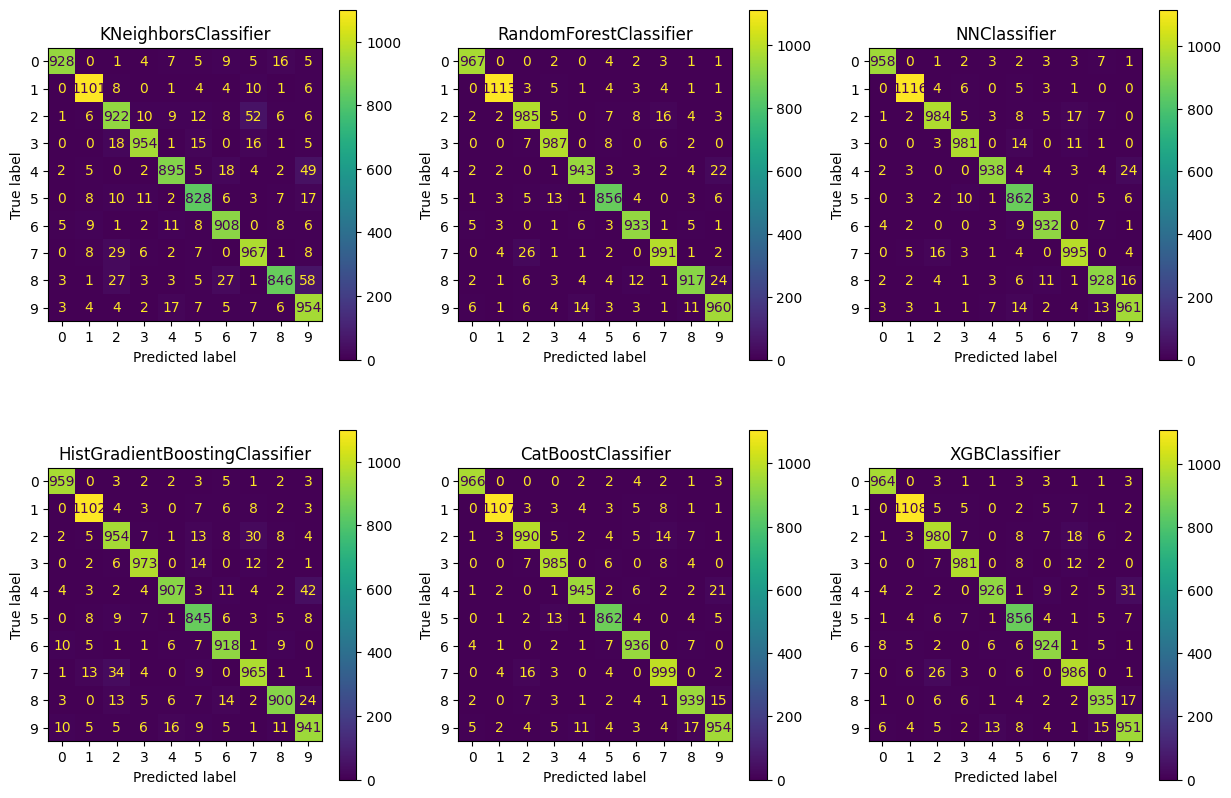

In [20]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### InformationValueFeatureSelector

Fitting the information value feature selector


information values: 100%|██████████| 2380/2380 [01:25<00:00, 27.87it/s]


Fitting complete


((60000, 2177), (10000, 2177))

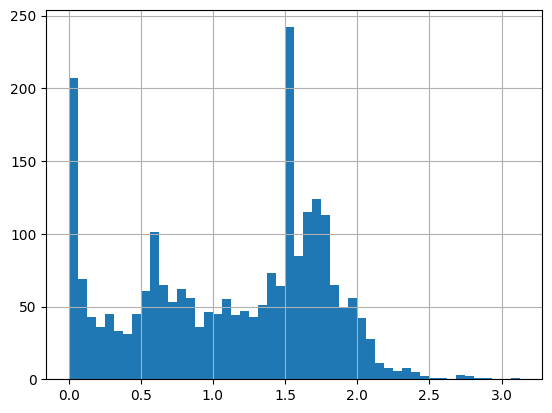

In [26]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.05, bins = 50)

train_features = feature_selector.fit_transform(train_features, train_labels)
test_features = feature_selector.transform(test_features)

feature_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.9374, 'TOP-2 Accuracy': 0.9771, 'TOP-3 Accuracy': 0.9883, 'TOP-4 Accuracy': 0.9918, 'TOP-5 Accuracy': 0.9948, 'TOP-6 Accuracy': 0.9961, 'TOP-7 Accuracy': 0.9973, 'TOP-8 Accuracy': 0.9982, 'TOP-9 Accuracy': 0.9994, 'AUC-ROC': 0.9968093389036341, 'Precision': 0.9380738953866068, 'Recall': 0.9369669521319166, 'F1-score': 0.9371232568168801}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.9698, 'TOP-2 Accuracy': 0.9875, 'TOP-3 Accuracy': 0.9936, 'TOP-4 Accuracy': 0.9962, 'TOP-5 Accuracy': 0.9975, 'TOP-6 Accuracy': 0.9983, 'TOP-7 Accuracy': 0.9992, 'TOP-8 Accuracy': 0.9998, 'TOP-9 Accuracy': 0.9998, 'AUC-ROC': 0.9991470698506546, 'Precision': 0.9695441681196316, 'Recall': 0.9695566908785063, 'F1-score': 0.9695173540003456}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000029C9E5E6020>
Input to L

100%|██████████| 25/25 [01:32<00:00,  3.70s/it, loss=9.04e+4, val_acc=0.969]


{'classifier': 'NNClassifier', 'Accuracy': 0.9688, 'TOP-2 Accuracy': 0.9873, 'TOP-3 Accuracy': 0.9924, 'TOP-4 Accuracy': 0.9951, 'TOP-5 Accuracy': 0.9967, 'TOP-6 Accuracy': 0.9982, 'TOP-7 Accuracy': 0.999, 'TOP-8 Accuracy': 0.9991, 'TOP-9 Accuracy': 0.9994, 'AUC-ROC': 0.9983937205757668, 'Precision': 0.968945727216418, 'Recall': 0.9685567911968791, 'F1-score': 0.9686929440635321}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 0.940 GB of training data: 6.668 s
Binning 0.104 GB of validation data: 0.090 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 158 leaves (15 on avg), max depth = 4, train loss: 1.58426, val loss: 1.59360, in 0.596s
[2/20] 10 trees, 159 leaves (15 on avg), max depth = 4, train loss: 1.26335, val loss: 1.27448, in 0.601s
[3/20] 10 trees, 158 leaves (15 on avg), max depth = 4, train loss: 1.05348, val loss: 1.06647, in 0.600s
[4/20] 10 trees, 159 leaves (15 on a

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9374,0.9771,0.9883,0.9918,0.9948,0.9961,0.9973,0.9982,0.9994,0.996809,0.938074,0.936967,0.937123
1,RandomForestClassifier,0.9698,0.9875,0.9936,0.9962,0.9975,0.9983,0.9992,0.9998,0.9998,0.999147,0.969544,0.969557,0.969517
2,NNClassifier,0.9688,0.9873,0.9924,0.9951,0.9967,0.9982,0.9990,0.9991,0.9994,0.998394,0.968946,0.968557,0.968693
3,HistGradientBoostingClassifier,0.9543,0.9833,0.9915,0.9948,0.9966,0.9977,0.9988,0.9993,0.9999,0.998502,0.954039,0.954069,0.953894
4,CatBoostClassifier,0.9714,0.9900,0.9963,0.9983,0.9988,0.9994,0.9996,0.9998,1.0000,0.999445,0.971116,0.971267,0.971165
5,XGBClassifier,0.9678,0.9866,0.9936,0.9966,0.9983,0.9986,0.9995,0.9996,0.9998,0.999163,0.967524,0.967691,0.967573


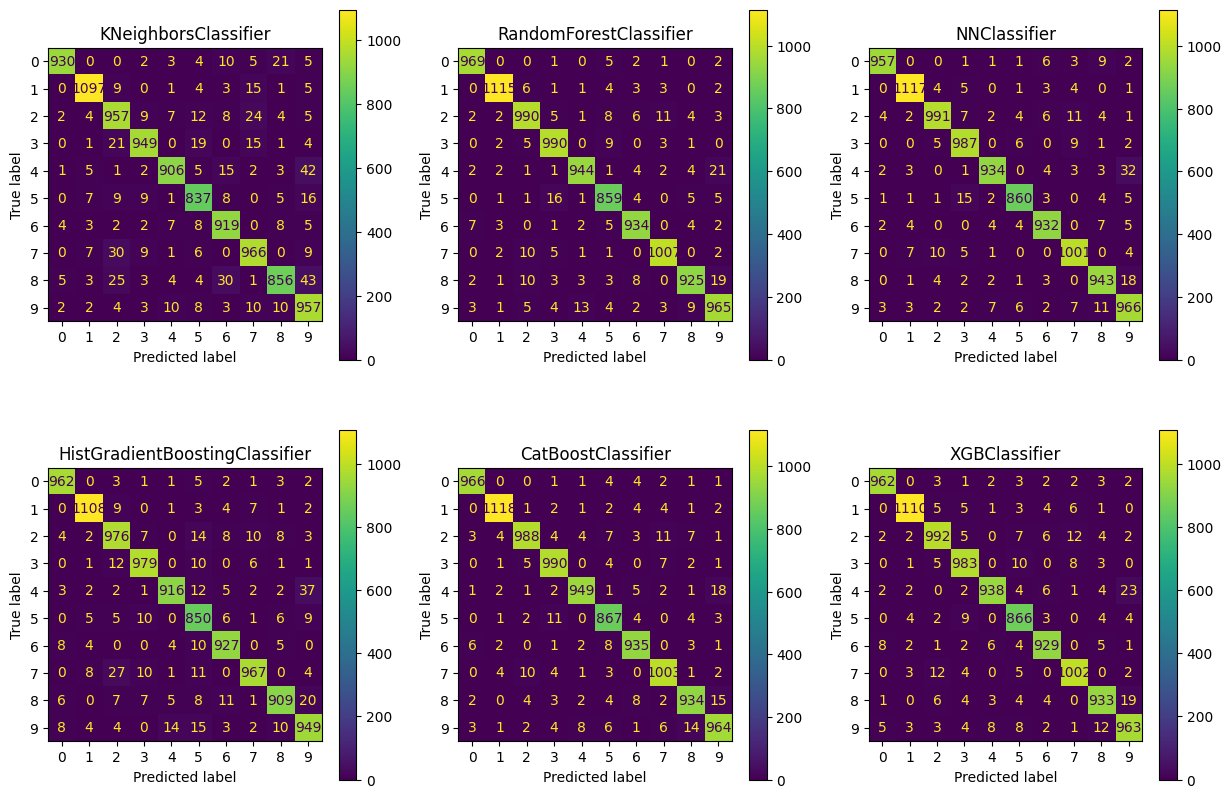

In [27]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### CorrelationSelector

Fitting the correlations feature selector
Fitting complete


((50000, 3437), (10000, 3437))

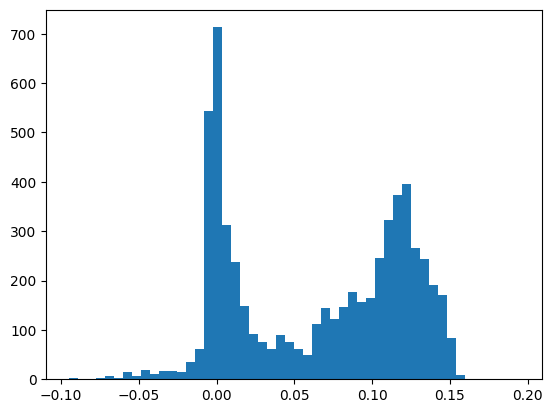

In [22]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)

train_features = correlation_selector.fit_transform(train_features, train_labels)
test_features = correlation_selector.transform(test_features)

correlation_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3281, 'TOP-2 Accuracy': 0.5111, 'TOP-3 Accuracy': 0.6332, 'TOP-4 Accuracy': 0.7205, 'TOP-5 Accuracy': 0.791, 'TOP-6 Accuracy': 0.8518, 'TOP-7 Accuracy': 0.9044, 'TOP-8 Accuracy': 0.9477, 'TOP-9 Accuracy': 0.9774, 'AUC-ROC': 0.7615164944444445, 'Precision': 0.3229936406730474, 'Recall': 0.32810000000000006, 'F1-score': 0.31688020385962556}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3906, 'TOP-2 Accuracy': 0.5826, 'TOP-3 Accuracy': 0.6943, 'TOP-4 Accuracy': 0.7731, 'TOP-5 Accuracy': 0.8357, 'TOP-6 Accuracy': 0.8871, 'TOP-7 Accuracy': 0.9299, 'TOP-8 Accuracy': 0.9607, 'TOP-9 Accuracy': 0.9828, 'AUC-ROC': 0.8031756055555556, 'Precision': 0.3823492439016348, 'Recall': 0.39059999999999995, 'F1-score': 0.38252018656531933}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026BA3014340>
Input t

100%|██████████| 25/25 [01:17<00:00,  3.12s/it, loss=1.03e+5, val_acc=0.427]


{'classifier': 'NNClassifier', 'Accuracy': 0.4275, 'TOP-2 Accuracy': 0.6411, 'TOP-3 Accuracy': 0.7489, 'TOP-4 Accuracy': 0.8217, 'TOP-5 Accuracy': 0.8743, 'TOP-6 Accuracy': 0.9136, 'TOP-7 Accuracy': 0.9462, 'TOP-8 Accuracy': 0.9696, 'TOP-9 Accuracy': 0.9856, 'AUC-ROC': 0.8221661222222221, 'Precision': 0.4176663198580292, 'Recall': 0.42750000000000005, 'F1-score': 0.4157793946599223}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3951, 'TOP-2 Accuracy': 0.5962, 'TOP-3 Accuracy': 0.7196, 'TOP-4 Accuracy': 0.8002, 'TOP-5 Accuracy': 0.8613, 'TOP-6 Accuracy': 0.9131, 'TOP-7 Accuracy': 0.9467, 'TOP-8 Accuracy': 0.9741, 'TOP-9 Accuracy': 0.9905, 'AUC-ROC': 0.8202327111111111, 'Precision': 0.38538612828700175, 'Recall': 0.39509999999999995, 'F1-score': 0.38461613483059603}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026C45BFF130>
Learn

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3281,0.5111,0.6332,0.7205,0.7910,0.8518,0.9044,0.9477,0.9774,0.761516,0.322994,0.3281,0.316880
1,RandomForestClassifier,0.3906,0.5826,0.6943,0.7731,0.8357,0.8871,0.9299,0.9607,0.9828,0.803176,0.382349,0.3906,0.382520
2,NNClassifier,0.4275,0.6411,0.7489,0.8217,0.8743,0.9136,0.9462,0.9696,0.9856,0.822166,0.417666,0.4275,0.415779
3,HistGradientBoostingClassifier,0.3951,0.5962,0.7196,0.8002,0.8613,0.9131,0.9467,0.9741,0.9905,0.820233,0.385386,0.3951,0.384616
4,CatBoostClassifier,0.4651,0.6696,0.7814,0.8546,0.9013,0.9369,0.9606,0.9812,0.9920,0.862041,0.458271,0.4651,0.460474
5,XGBClassifier,0.4188,0.6253,0.7444,0.8236,0.8800,0.9237,0.9541,0.9755,0.9917,0.838294,0.409160,0.4188,0.410438


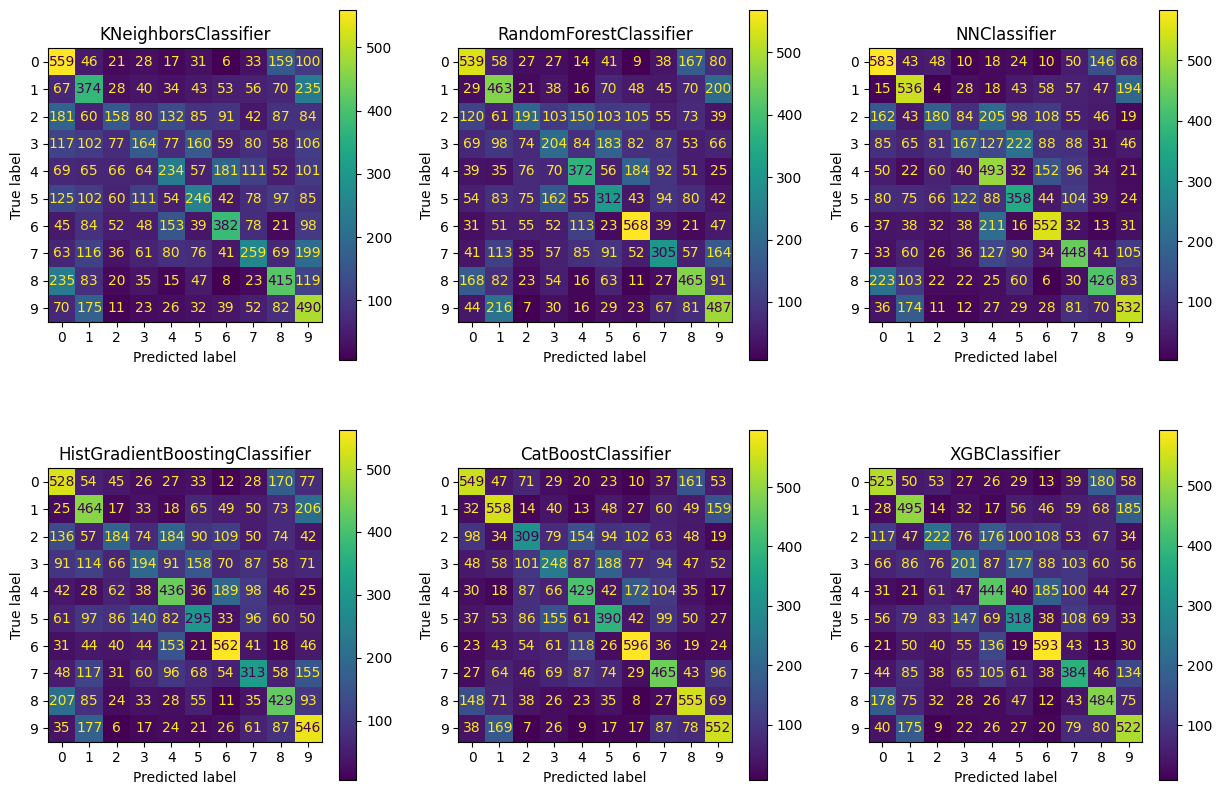

In [23]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### PCA

In [24]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components = 64, random_state = 42)

train_features = pca.fit_transform(train_features)
print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
print([ round(x, 3) for x in pca.explained_variance_ratio_ ])

test_features = pca.transform(test_features)

train_features.shape, test_features.shape

Explained variance 0.94
[0.633, 0.08, 0.035, 0.029, 0.027, 0.015, 0.011, 0.008, 0.008, 0.006, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


((50000, 64), (10000, 64))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3188, 'TOP-2 Accuracy': 0.5049, 'TOP-3 Accuracy': 0.6263, 'TOP-4 Accuracy': 0.7143, 'TOP-5 Accuracy': 0.7885, 'TOP-6 Accuracy': 0.8558, 'TOP-7 Accuracy': 0.905, 'TOP-8 Accuracy': 0.9458, 'TOP-9 Accuracy': 0.9765, 'AUC-ROC': 0.7579191666666667, 'Precision': 0.3117832806213368, 'Recall': 0.3188, 'F1-score': 0.30848343683716956}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3597, 'TOP-2 Accuracy': 0.5489, 'TOP-3 Accuracy': 0.6649, 'TOP-4 Accuracy': 0.7538, 'TOP-5 Accuracy': 0.8252, 'TOP-6 Accuracy': 0.8762, 'TOP-7 Accuracy': 0.9209, 'TOP-8 Accuracy': 0.9547, 'TOP-9 Accuracy': 0.9817, 'AUC-ROC': 0.7839118833333335, 'Precision': 0.34994195130772565, 'Recall': 0.35969999999999996, 'F1-score': 0.351417831994301}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026C4501F2E0>
Input to LazyLinear: 

100%|██████████| 25/25 [00:30<00:00,  1.22s/it, loss=1.08e+5, val_acc=0.373]


{'classifier': 'NNClassifier', 'Accuracy': 0.3732, 'TOP-2 Accuracy': 0.5713, 'TOP-3 Accuracy': 0.6965, 'TOP-4 Accuracy': 0.7808, 'TOP-5 Accuracy': 0.8416, 'TOP-6 Accuracy': 0.8896, 'TOP-7 Accuracy': 0.9278, 'TOP-8 Accuracy': 0.9577, 'TOP-9 Accuracy': 0.9837, 'AUC-ROC': 0.7916011555555558, 'Precision': 0.36524308922218995, 'Recall': 0.37320000000000003, 'F1-score': 0.3584682744226489}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3347, 'TOP-2 Accuracy': 0.531, 'TOP-3 Accuracy': 0.6533, 'TOP-4 Accuracy': 0.7487, 'TOP-5 Accuracy': 0.8213, 'TOP-6 Accuracy': 0.8792, 'TOP-7 Accuracy': 0.9234, 'TOP-8 Accuracy': 0.9586, 'TOP-9 Accuracy': 0.9817, 'AUC-ROC': 0.7774928222222223, 'Precision': 0.3251244004247456, 'Recall': 0.33469999999999994, 'F1-score': 0.32397423861717867}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BB6C2C310>
Learni

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3188,0.5049,0.6263,0.7143,0.7885,0.8558,0.9050,0.9458,0.9765,0.757919,0.311783,0.3188,0.308483
1,RandomForestClassifier,0.3597,0.5489,0.6649,0.7538,0.8252,0.8762,0.9209,0.9547,0.9817,0.783912,0.349942,0.3597,0.351418
2,NNClassifier,0.3732,0.5713,0.6965,0.7808,0.8416,0.8896,0.9278,0.9577,0.9837,0.791601,0.365243,0.3732,0.358468
3,HistGradientBoostingClassifier,0.3347,0.5310,0.6533,0.7487,0.8213,0.8792,0.9234,0.9586,0.9817,0.777493,0.325124,0.3347,0.323974
4,CatBoostClassifier,0.4003,0.6070,0.7283,0.8114,0.8725,0.9169,0.9491,0.9726,0.9890,0.826097,0.392661,0.4003,0.395049
5,XGBClassifier,0.3588,0.5561,0.6855,0.7766,0.8436,0.8940,0.9359,0.9665,0.9860,0.798829,0.348436,0.3588,0.349525


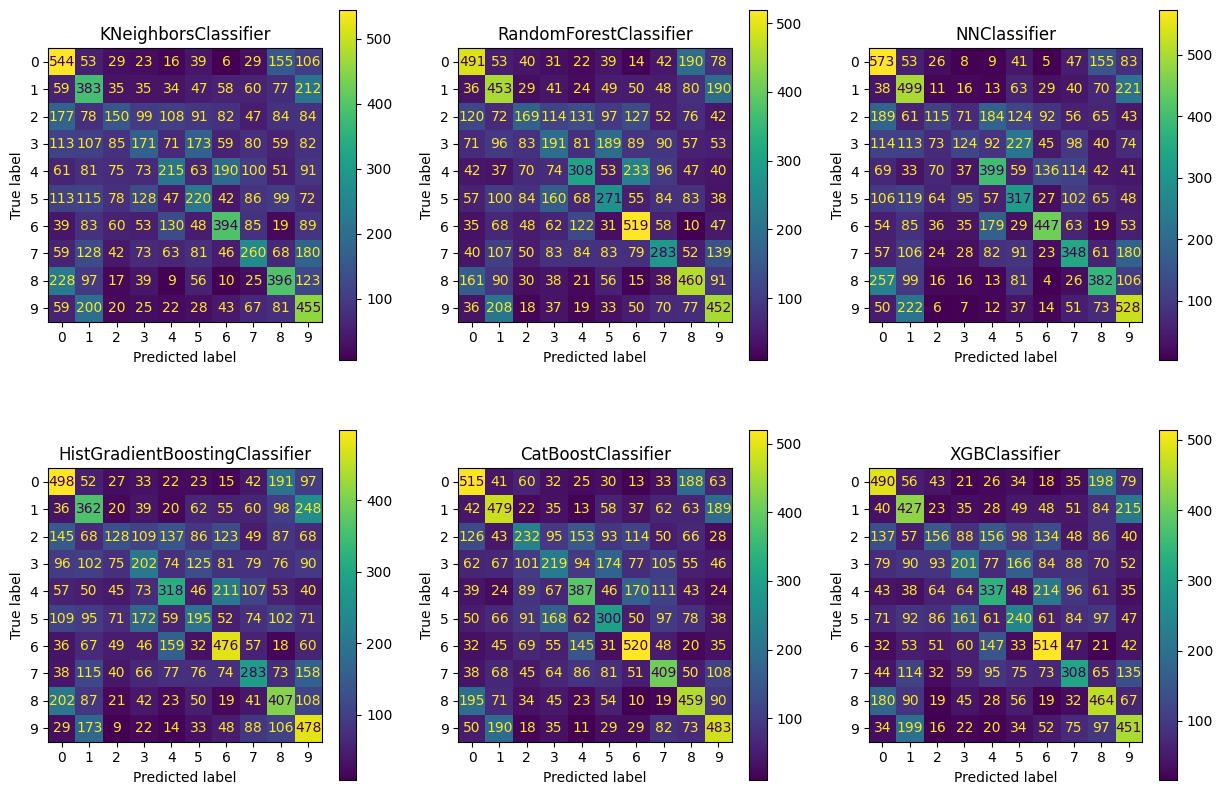

In [25]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)